# Домашнее задание

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

## Импорт библиотек и загрузка данных

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 15)

# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/market_arrivals_ind.csv")

In [37]:
df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

In [38]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Оставим только данные по городу Бангалор

In [39]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [40]:
# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [41]:
ts.head()

,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390


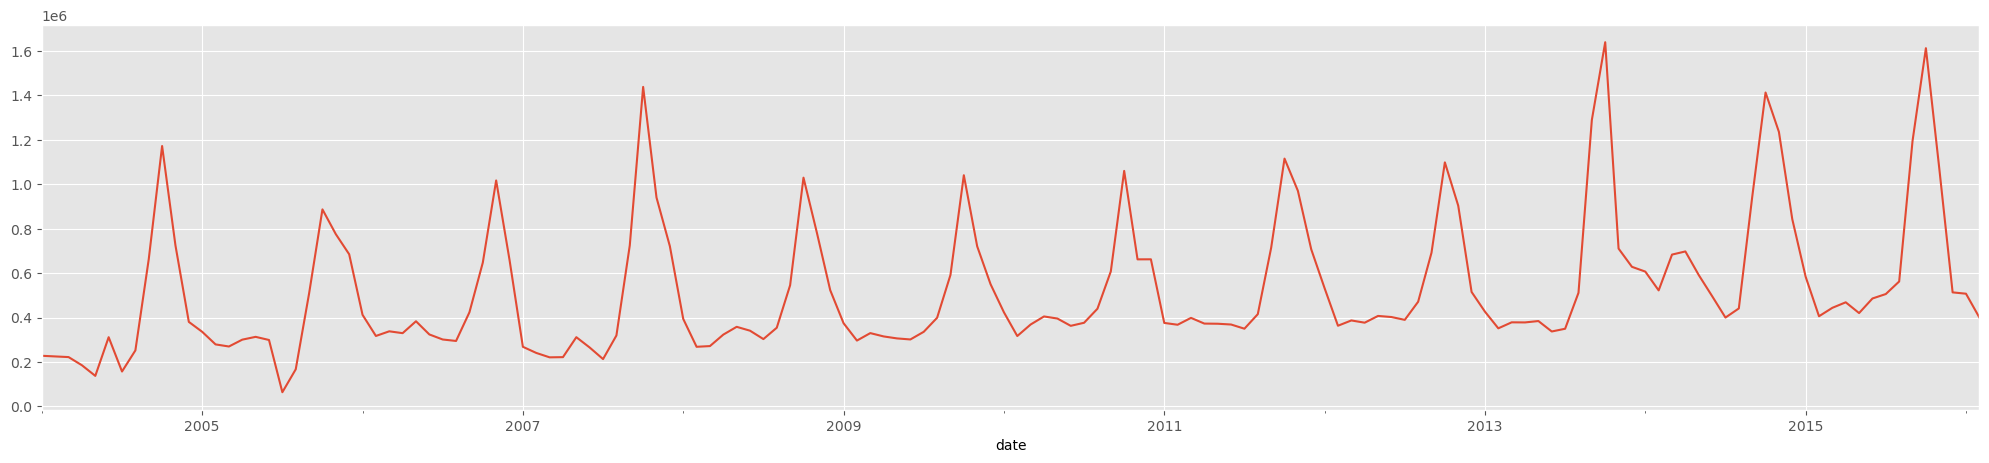

In [42]:
ts.quantity.plot(figsize=(25,5));

## Quiz

Примените критерий Дики-Фуллера

Есть ли в ряде единичные корни?

In [43]:
from statsmodels.tsa import stattools


df_stat = stattools.adfuller(ts)
    
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
      (df_stat[0], df_stat[1], df_stat[4]))


if df_stat[0] > df_stat[4]['5%']:
    print('Есть единичные корни - ряд нестационарный') # 100% верно
else:
    print('Единичных корней нет, ряд стационарен') # не всегда верно

The Augmented Dickey-Fuller test statistic -0.878007, 
pvalue: 0.80
critical values: {'1%': -3.480500383888377, '5%': -2.8835279559405045, '10%': -2.578495716547007}
Есть единичные корни - ряд нестационарный


## Quiz

Примените kpss-тест

Является ли ряд стационарным?

In [44]:
from statsmodels.tsa.stattools import kpss

kpss_stat = stattools.kpss(ts)

print('The KPSS test statistic %f, \npvalue: %.3f \ntable distribution: %s' %
      (kpss_stat[0], kpss_stat[1], kpss_stat[3]))

if kpss_stat[0] > kpss_stat[3]['5%']:
    print('Отвергаем H0, значит, ряд нестационарный')
else:
    print('Ряд стационарный')

The KPSS test statistic 0.836230, 
pvalue: 0.010 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Отвергаем H0, значит, ряд нестационарный


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Quiz

Найдите оптимальное $\lambda$ для преобразования Бокса-Кокса

(отрицательные значения говорят о том, что нужно просто логарифмировать ряд - в этом случае считайте, что $\lambda=0$)

Ответ при необходимости округлите до сотых.

In [45]:
from copy import deepcopy
from scipy import stats

ts_boxcox = deepcopy(ts)

print('optimal lambda:', stats.boxcox(ts['quantity'])[1])

optimal lambda: -0.037973926946732316


Примените преобразование Бокса-Кокса с найденным значением $\lambda$. Далее работайте с преобразованным рядом (и к исходному не возвращайтесь!)

## Quiz

Постройте измененный ряд. Стала ли дисперсия более однородной визуально?

<Axes: xlabel='date'>

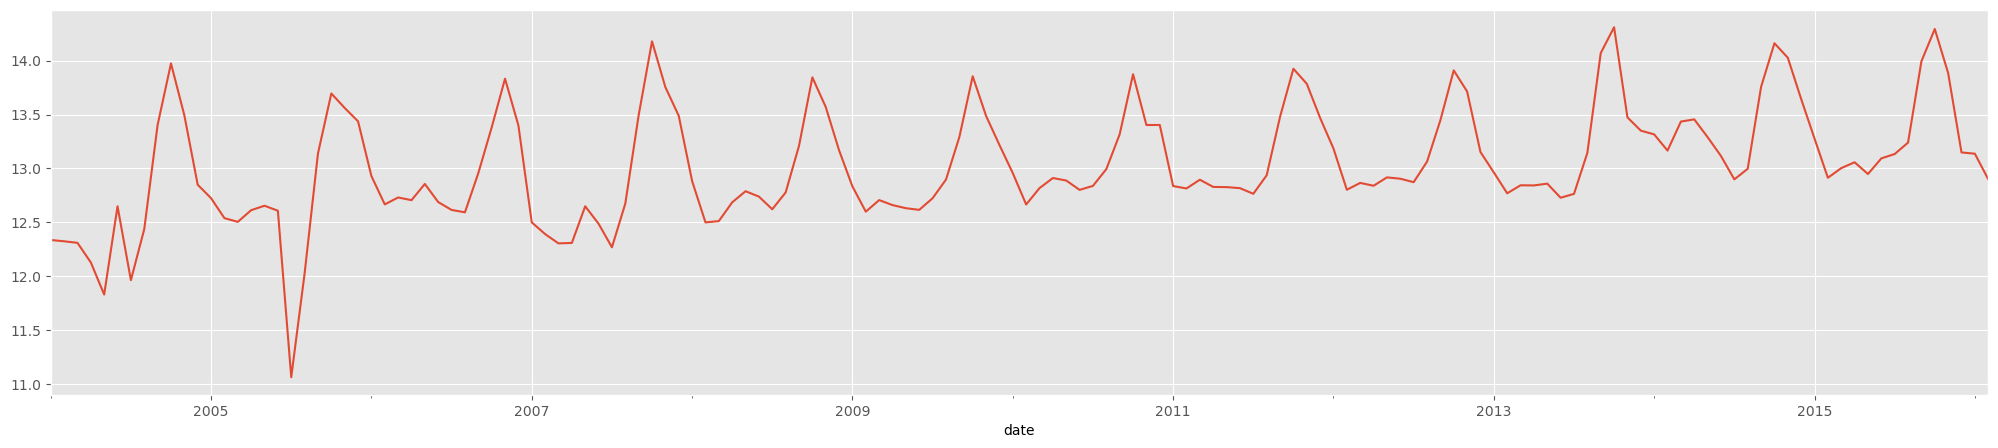

In [46]:
ts_boxcox['quantity'] = np.log(ts['quantity'])
ts_boxcox['quantity'].plot(figsize=(25,5))

In [48]:
ts.head()

,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390


In [49]:
ts_boxcox.head()

,quantity
date,
2004-01,12.34
2004-02,12.32
2004-03,12.31
2004-04,12.13
2004-05,11.83


## Quiz

Визуально в ряде есть небольшой возрастающий тренд.

Продифференцируйте ряд и примените к результату kpss-тест.

Стал ли ряд стационарным?

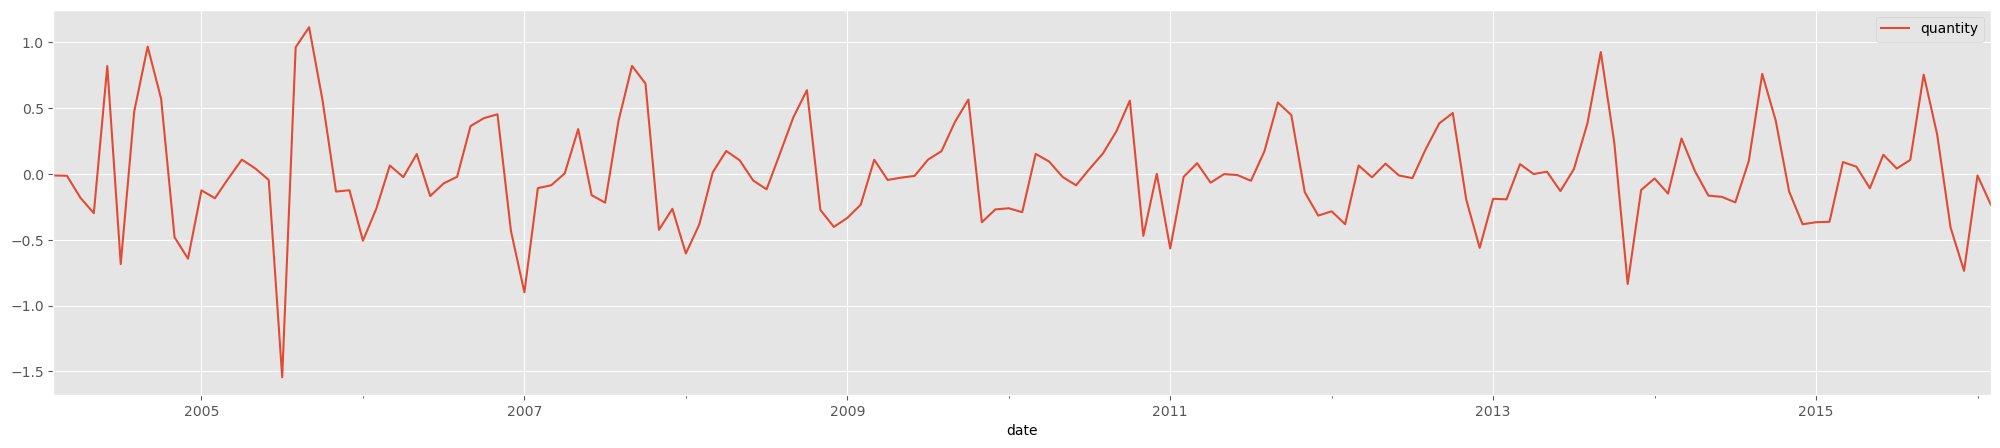

In [50]:
ts_boxcox_diff = (ts_boxcox - ts_boxcox.shift(1))[1:]
ts_boxcox_diff.plot(figsize=(25,5));

In [51]:
from statsmodels.tsa.stattools import kpss

kpss_stat = stattools.kpss(ts_boxcox_diff['quantity'])

print('The KPSS test statistic %f, \npvalue: %.3f \ntable distribution: %s' %
      (kpss_stat[0], kpss_stat[1], kpss_stat[3]))

if kpss_stat[0] > kpss_stat[3]['5%']:
    print('Отвергаем H0, значит, ряд нестационарный')
else:
    print('Ряд стационарный')

The KPSS test statistic 0.074399, 
pvalue: 0.100 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Ряд стационарный


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [52]:
ts_boxcox_diff.head()

,quantity
date,
2004-02,-0.01
2004-03,-0.01
2004-04,-0.18
2004-05,-0.30
2004-06,0.82


Для продифференцированного ряда постройте графики ACF и PACF.

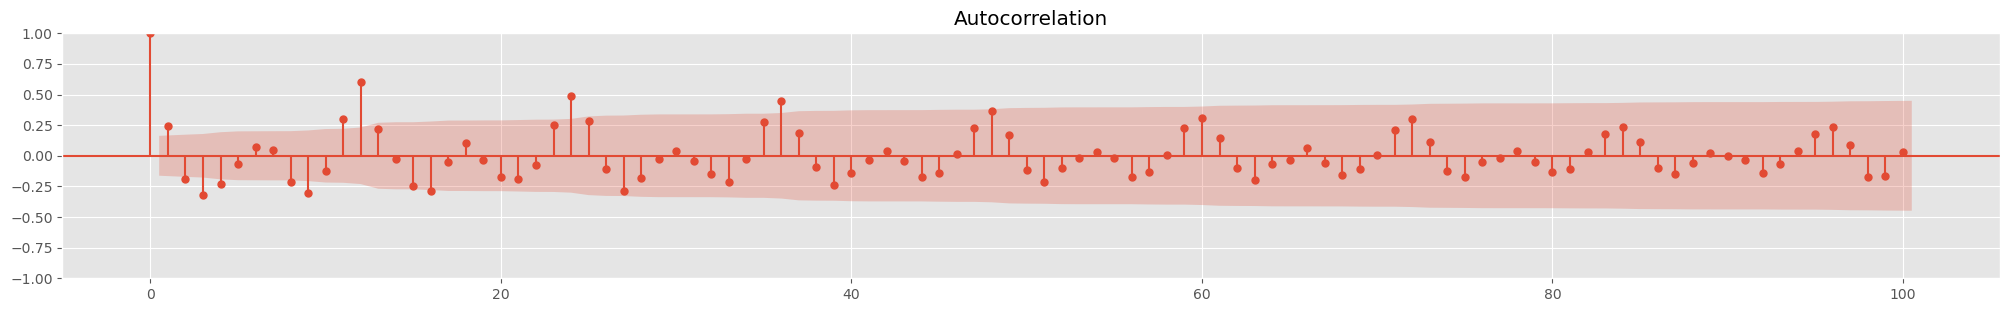

In [80]:
# Autocorrelaction function (ACF)
import statsmodels.api as sm

fig = plt.figure(figsize=(25,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_boxcox_diff, lags=100, ax = ax1);

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


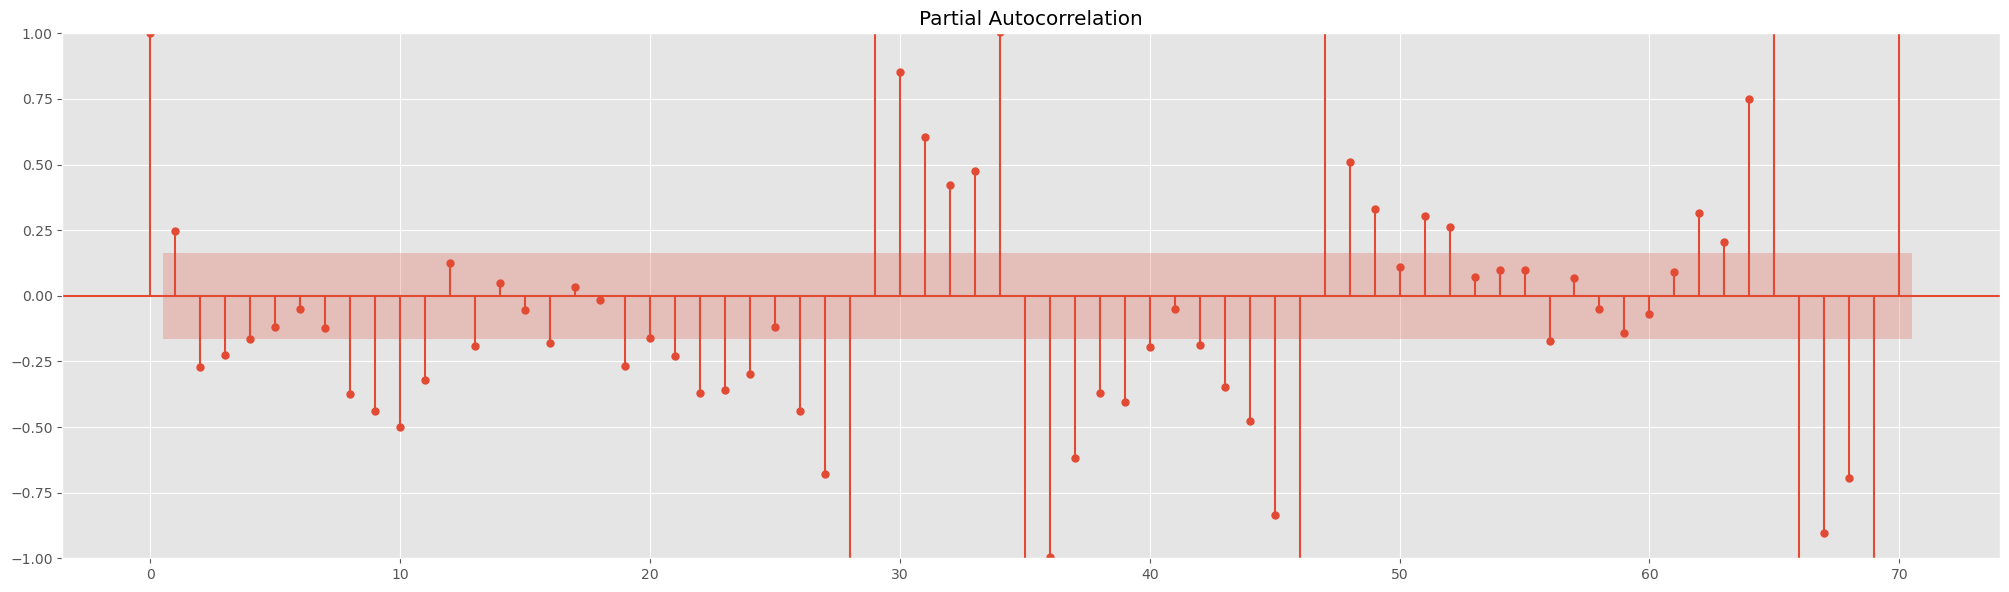

In [81]:
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(ts_boxcox_diff, lags=70, ax = ax1)

## Quiz

По построенным графикам определите значения $p$ и $q$ для модели ARIMA/SARIMAX.

В диапазоны значений входят все значения от 0 до максимального значимого лага за период (сам лаг периода уже не учитывается).

Подсказка: по графикам диапазоны значений $p$ и $q$ получаются одинаковыми. Чему равно максимальное значение из полученного диапазона.

**Ответ:** 11

## Обучение модели SARIMAX

Разобъем данные на train, val, test.

* train - первые 65% данных

* val - следующие 20% данных

* test - последние 15% данных

In [56]:
train_length = int(len(ts_boxcox_diff) * 0.65)
val_length = int(len(ts_boxcox_diff) * 0.2)

train = ts_boxcox_diff[:train_length]
val = ts_boxcox_diff[train_length:train_length+val_length]
test = ts_boxcox_diff[train_length+val_length:]

train.shape, val.shape, test.shape

((94, 1), (29, 1), (22, 1))

## Quiz

Среди найденных диапазонов $p$ и $q$ подберите оптимальную тройку $(p,d,q)$ ($d$ нашли выше, когда дифференцировали ряд и смотрели на результат) с помощью вложенного цикла.

В цикле обучайте модель SARIMAX на train и смотрите AIC на val.

In [59]:
import itertools
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


# Предполагаемые диапазоны для p и q
p_range = range(0, 12)  # Задайте диапазон по вашему усмотрению
q_range = range(0, 12)  # Задайте диапазон по вашему усмотрению

# Задаем d, который вы нашли ранее при дифференциации ряда
d_range = range(0, 2)  # Пример, замените на свое значение

# Создаем список всех комбинаций p, d, q
best_score, best_cfg = float("inf"), None

for p in p_range:
    for d in d_range:
        for q in q_range:
            order = (p,d,q)
            try:
                model = sm.tsa.statespace.SARIMAX(train['quantity'], order=order, enforce_invertibility=True, enforce_stationarity=True).fit()
                y_hat = model.predict(start = val.index[0], end = val.index[-1])

                if model.aic < best_score:
                    best_score, best_cfg = model.aic, order
                    print('SARIMAX%s AIC=%.3f' % (order, model.aic))
            except:
                continue
print('Best SARIMAX%s AIC=%.3f' % (best_cfg, best_score))



SARIMAX(0, 0, 0) AIC=102.737
SARIMAX(0, 0, 1) AIC=99.777
SARIMAX(0, 0, 3) AIC=81.880


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 6) AIC=80.990


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 7) AIC=65.568


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarnin

SARIMAX(2, 0, 9) AIC=62.211


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:9

SARIMAX(4, 0, 6) AIC=52.812


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarnin

SARIMAX(6, 0, 6) AIC=52.394


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(6, 0, 8) AIC=43.200


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(6, 0, 9) AIC=40.067


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarnin

SARIMAX(7, 0, 8) AIC=38.199


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Converge

SARIMAX(7, 1, 1) AIC=18.000


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\states

Best SARIMAX(7, 1, 1) AIC=18.000


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [76]:
model = sm.tsa.statespace.SARIMAX(train['quantity'], order=(11,1,3)).fit()
model.aic

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


49.591797771949736

Сделайте прогноз на **test**.

In [77]:
y_hat = model.predict(start=len(train), end=(len(train)+len(test)-1))

## Quiz

Нарисуйте правильный ответ на test и прогноз на test. Вычислите RMSE на test. Ответ округлите до сотых.

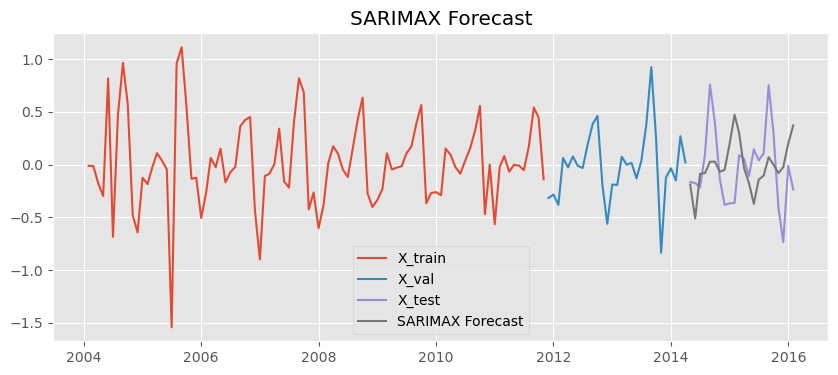

In [78]:
plt.figure(figsize=(10,4))
plt.plot(train.index.to_timestamp(), train['quantity'].values, label='X_train')
plt.plot(val.index.to_timestamp(), val['quantity'].values, label='X_val')
plt.plot(test.index.to_timestamp(), test['quantity'].values, label='X_test')
plt.plot(test.index.to_timestamp(), y_hat, label='SARIMAX Forecast')
plt.legend(loc='best')
plt.title('SARIMAX Forecast')
plt.show()

In [79]:
from sklearn.metrics import mean_squared_error

print('RMSE = %.3f' % mean_squared_error(test, y_hat) ** 0.5)

RMSE = 0.424


По графикам ACF и PACF определите примерные диапазоны для P и Q, найдите S.

Нулевые значения также рассматривайте.

Зафиксируйте найденные ранее (p,d,q). Подберите в цикле аналогично подбору для $p, q$ оптимальные значения из найденных диапазонов.

D перебирайте в диапазоне {0, 1}.

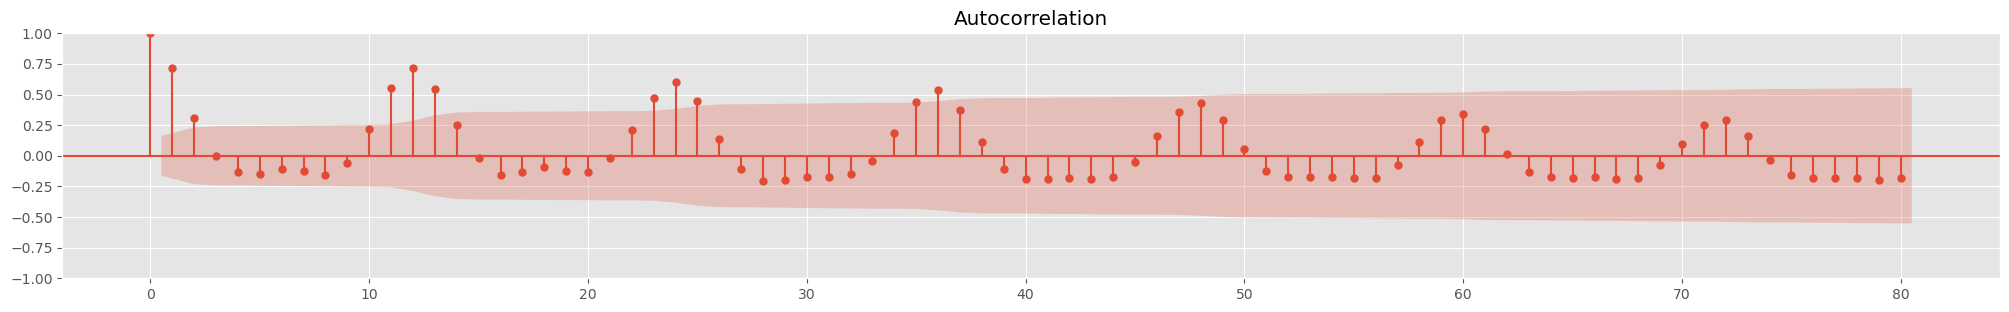

In [70]:
fig = plt.figure(figsize=(25,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_boxcox, lags=80, ax = ax1)

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


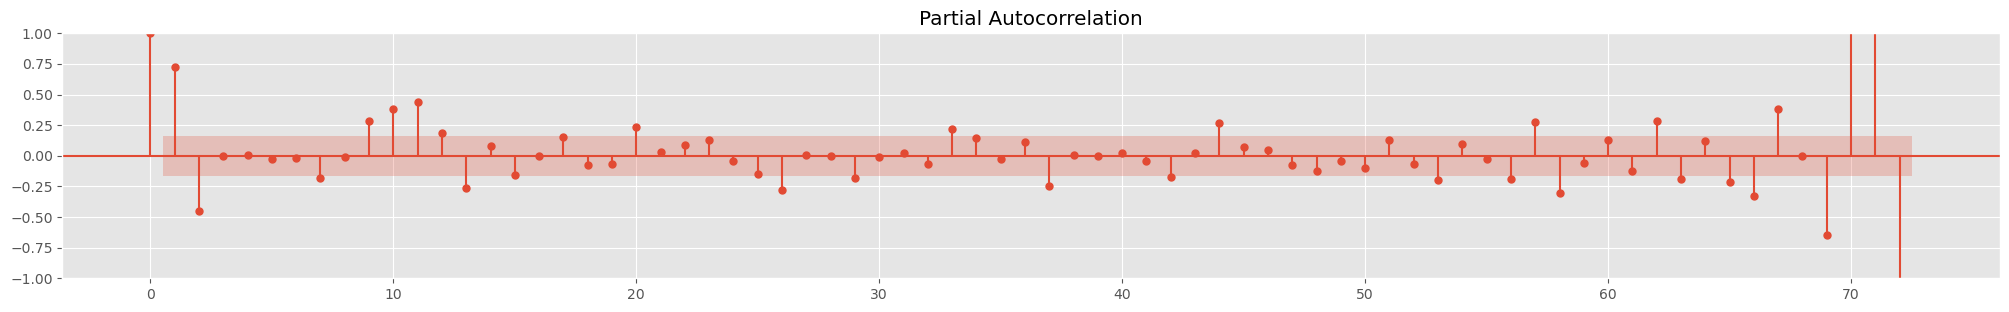

In [71]:
fig = plt.figure(figsize=(25,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(ts_boxcox, lags=72, ax = ax1)


Обучите на train модель с найденными (p,d,q), (P,D,Q,S),выведите на экран AIC - ответ округлите до сотых.

In [72]:
best_score, best_cfg = float("inf"), None
P = 1
Q = 3
D = 1

for P_try in range(P+1):
  for Q_try in range(Q+1):
      for D_try in range(D+1):
        model = sm.tsa.statespace.SARIMAX(train['quantity'], order=(11,1,3), seasonal_order=(P_try, D_try, Q_try, 12)).fit()
        y_hat = model.predict(start=len(train), end=(len(train)+len(val)-1))

        if model.aic < best_score:
          best_score = model.aic
          print('P = %.3f, Q = %.3f, D = %.3f' % (P_try, Q_try, D_try))
          print('SARIMAX AIC=%.3f' % best_score)
          print('RMSE: ', mean_squared_error(val['quantity'], y_hat) ** 0.5)

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


P = 0.000, Q = 0.000, D = 0.000
SARIMAX AIC=49.592
RMSE:  0.24665889540472805


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\states

P = 0.000, Q = 1.000, D = 0.000
SARIMAX AIC=44.876
RMSE:  0.24406720614193575


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


P = 0.000, Q = 1.000, D = 1.000
SARIMAX AIC=41.603
RMSE:  0.23670794632869852


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarim

Сделайте прогноз на test.

In [73]:
model = sm.tsa.statespace.SARIMAX(train['quantity'], order=(11,1,3), seasonal_order=(0,1,1,12)).fit()
model.aic

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


41.60314278181534

In [74]:
y_hat = model.predict(start=len(train)+len(val), end=len(train)+len(val)+len(test)-1)

## Quiz

Нарисуйте правильный ответ на test и прогноз на test. Вычислите RMSE на test. Ответ округлите до сотых.

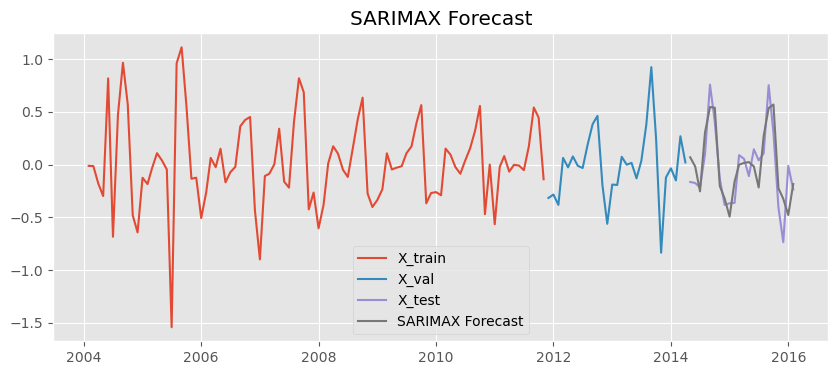

In [75]:
plt.figure(figsize=(10,4))
plt.plot(train.index.to_timestamp(), train['quantity'].values, label='X_train')
plt.plot(val.index.to_timestamp(), val['quantity'].values, label='X_val')
plt.plot(test.index.to_timestamp(), test['quantity'].values, label='X_test')
plt.plot(test.index.to_timestamp(), y_hat, label='SARIMAX Forecast')
plt.legend(loc='best')
plt.title('SARIMAX Forecast')
plt.show()

In [82]:
print('RMSE = %.3f' % mean_squared_error(test['quantity'], y_hat) ** 0.5)

RMSE = 0.424
